In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
#load dataset
data = pd.read_csv("datasets/Real_Estate.csv")

data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


##### Check for null values in the dataset

In [14]:
data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

#### there are no null values in the dataset. 
#### Lets look at descriptive statistics of the dataset.

In [15]:
data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


##### Lets look at the histogram of all numerical features

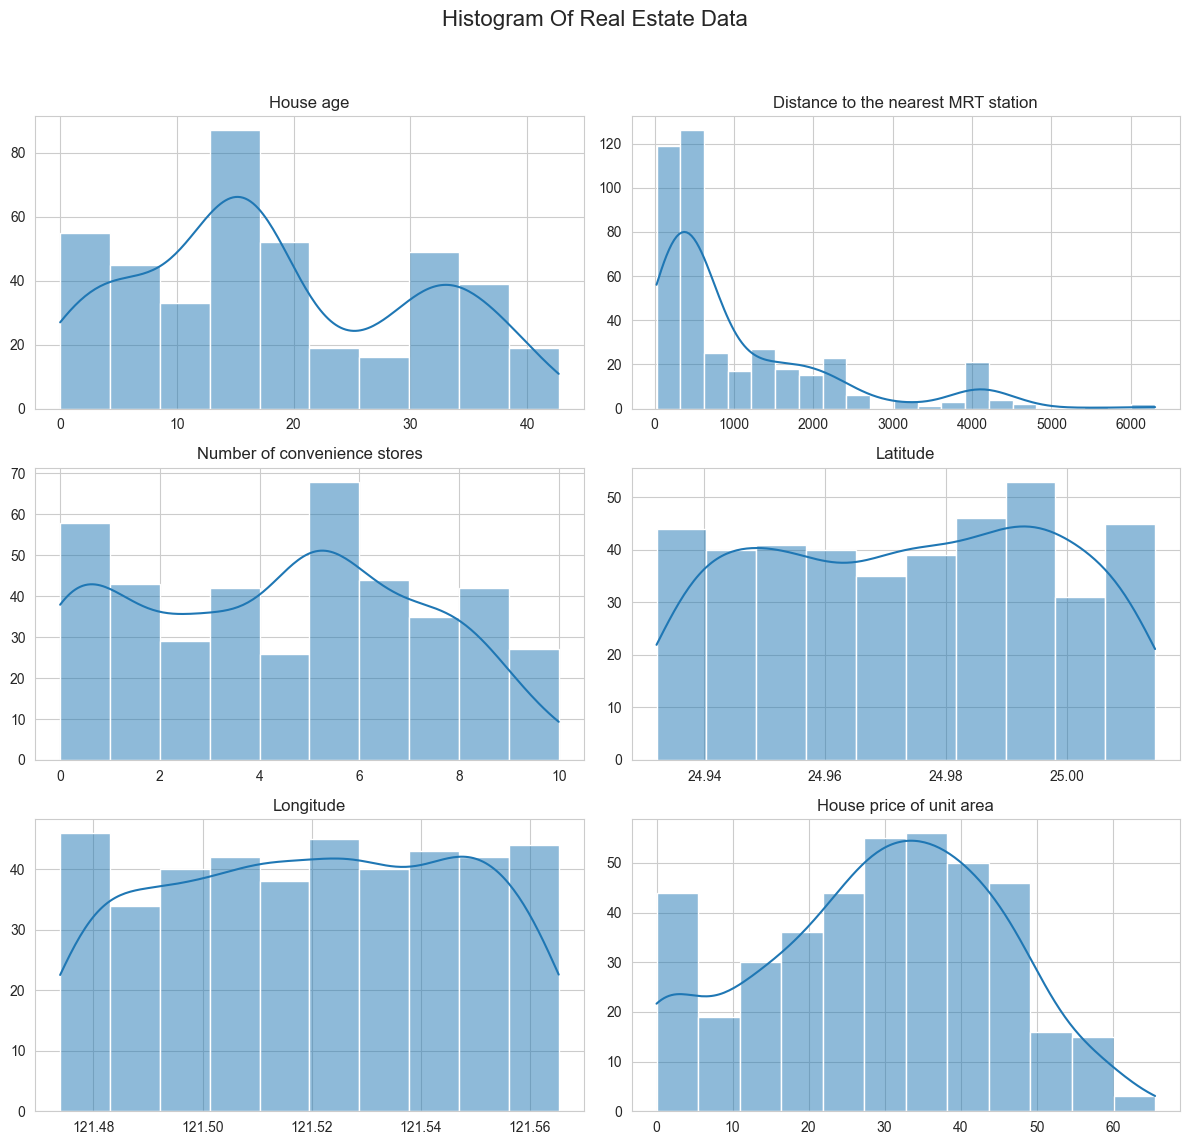

In [16]:
#set the asthetic style of the plots
sns.set_style('whitegrid')

#create histogram for the numerical columns
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 12))
fig.suptitle("Histogram Of Real Estate Data", fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Insight into the distribution of each variable
##### 1. House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).
##### 2. Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower 
#####    distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.
##### 3. Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common
#####    configurations in terms of convenience store availability.
##### 4. Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited
#####    area.
##### 5. House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer
#####     properties as prices increase.

#### Creating a scatterplot to explore the relationship between these variables and the house price.

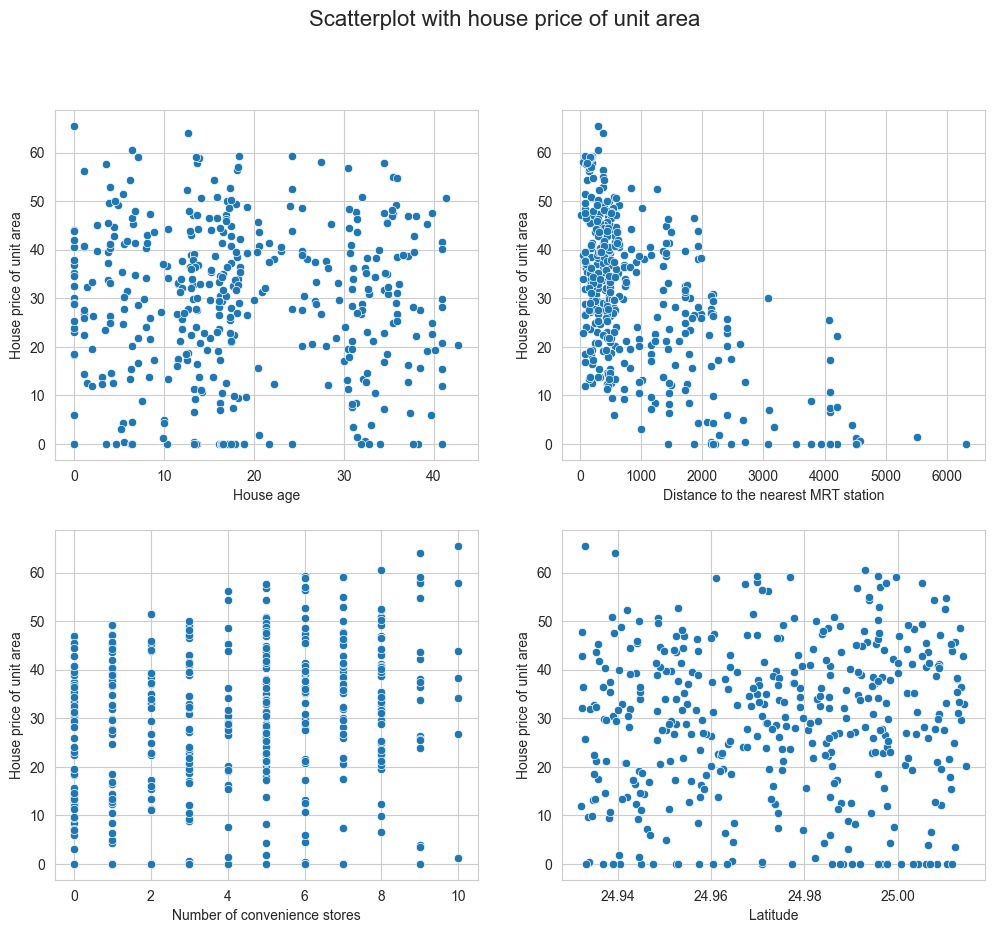

In [17]:
#scatterplot to observe the relationship with house price
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Scatterplot with house price of unit area", fontsize=16)

#scatterplot for each variable against the house price
sns.scatterplot(data=data, x= "House age", y="House price of unit area", ax=axes[0,0])
sns.scatterplot(data=data, x= "Distance to the nearest MRT station", y="House price of unit area", ax=axes[0,1])
sns.scatterplot(data=data, x= "Number of convenience stores", y="House price of unit area", ax=axes[1,0])
sns.scatterplot(data=data, x= "Latitude", y="House price of unit area", ax=axes[1,1])

plt.tight_layout=[0, 0.03, 1, 0.95]
plt.show()

##### Interesting relationship between various factor and house price
##### 1. House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new
#####    and very old houses might have higher prices.
##### 2. Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases,
#####    the house price tends to decrease. It suggests a strong negative relationship between these two variables.
##### 3. Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house
#####    prices. Houses with more convenience stores in the vicinity tend to have higher prices.
##### 4. Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or
#####    lowerhouse prices. It could be indicative of specific neighbourhoods being more desirable.

#### Perfoming a correlation analysis to quantify the relationships between these variables .

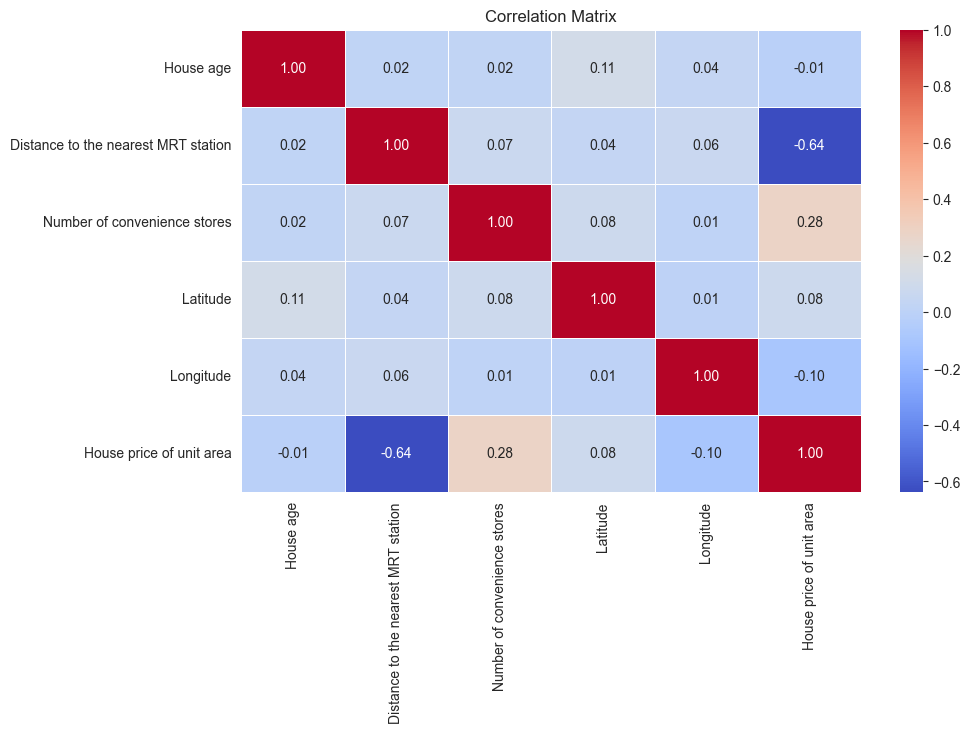

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


In [18]:
data = data.drop(columns=['Transaction date'], errors='ignore')

#correlation matrix
corr_matrix = data.corr()

#plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()   

corr_matrix

The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:


1. House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.
2. Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.
3. Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.
4. Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

### Building models to predict real estate price by using Linear Regression and Decision Tree

In [19]:
#feature selection and target variable
features = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = "House price of unit area"

X = data[features]
y = data[target]

#Split the dataset into training  and testing  sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)

(331, 5)
(331,)


### Linear Regression Model

In [21]:
#model initialization
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

LinearRegression()

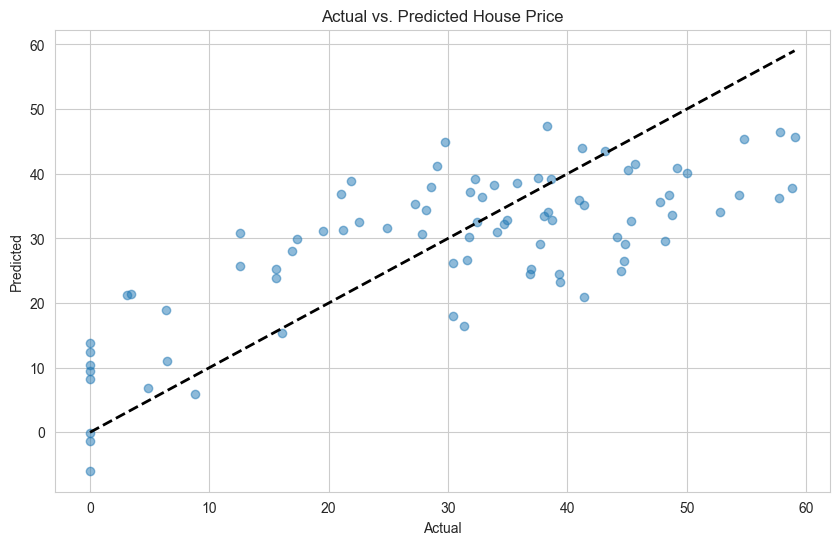

In [22]:
# visualizing the actual values versus predicted values
#making prediction using LR

y_pred_lr =  model.predict(X_test)


#visualize : Actual vs Predicted 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted House Price")
plt.show()

In [23]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 11.162843441979806


The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

### Random Forest Regressor Algorithm

In [24]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [25]:
#model initialization
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

#train rf model
rf_random.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\ANYONE\RealEstate_Predictor\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}


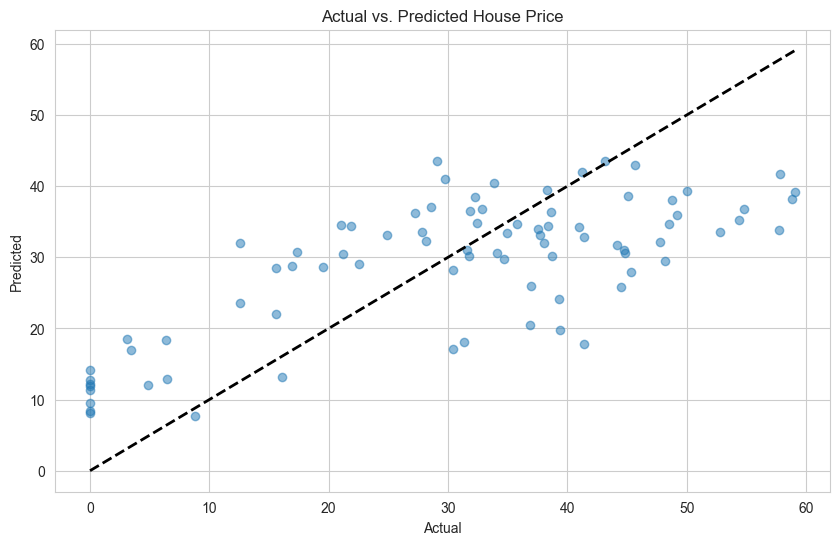

In [25]:
# visualizing the actual values versus predicted values
#making prediction using RF

y_pred_rf = rf_random.predict(X_test)

#visualize : Actual vs Predicted 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted House Price")
plt.show()

In [26]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 11.710783402999434


In [26]:
import joblib

joblib.dump(rf_random, "model.pkl")

['model.pkl']